In [1]:
import pandas as pd
import numpy as np

In [2]:
# #设置显示全部行，不省略
# pd.set_option('display.max_rows', None)
# #设置显示全部列，不省略
# pd.set_option('display.max_columns', None)
# #设置显示全部列宽， 不省略
# pd.set_option('display.max_colwidth', None)

# Multilndex层级索引对象

## 创建层级索引

In [3]:
series_obj = pd.Series(
    data=np.random.rand(12),
    index=[['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'c', 'c', 'c', 'c'],
           [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])
series_obj

a  0    0.049183
   1    0.488575
   2    0.677469
   3    0.951922
b  0    0.490063
   1    0.989270
   2    0.313611
   3    0.729979
c  0    0.368067
   1    0.423137
   2    0.809852
   3    0.249237
dtype: float64

In [4]:
# 如果index行索引具有嵌套的格式, 那么索引部分就是 MultiIndex 数据类型
series_obj.index

MultiIndex([('a', 0),
            ('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 0),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 0),
            ('c', 1),
            ('c', 2),
            ('c', 3)],
           )

In [5]:
series_obj.values

array([0.04918286, 0.48857453, 0.67746944, 0.95192241, 0.49006335,
       0.98926952, 0.3136113 , 0.72997916, 0.36806707, 0.42313685,
       0.80985191, 0.2492371 ])

In [6]:
print(series_obj[:, 2])

a    0.677469
b    0.313611
c    0.809852
dtype: float64


## 层级索引取值

In [7]:
series_obj['b']

0    0.490063
1    0.989270
2    0.313611
3    0.729979
dtype: float64

In [8]:
series_obj['b', 2]

0.31361129884172967

In [9]:
series_obj['b', :]

0    0.490063
1    0.989270
2    0.313611
3    0.729979
dtype: float64

## DataFrame层级索引

In [10]:
df = pd.DataFrame(data=[[85, 90], [59, 66], [79, 88], [32, 43], [88, 99],
                        [84, 90]],
                  index=[
                      ['张三', '张三', '李四', '李四', '王五', '王五'],
                      ['语文', '数学', '语文', '数学', '语文', '数学'],
                  ],
                  columns=[['初三', '初三'], ['期中考试', '期末考试']])
df

初三     
      期中考试 期末考试
张三 语文   85   90
   数学   59   66
李四 语文   79   88
   数学   32   43
王五 语文   88   99
   数学   84   90

# 排序

## Series排序

In [11]:
df = pd.read_csv('./data/stock_day.csv')
df

Unnamed: 0   open   high  close    low     volume  price_change  p_change  \
0    2018/2/27  23.53  25.88  24.16  23.53   95578.03          0.63      2.68   
1    2018/2/26  22.80  23.78  23.53  22.80   60985.11          0.69      3.02   
2    2018/2/23  22.88  23.37  22.82  22.71   52914.01          0.54      2.42   
3    2018/2/22  22.25  22.76  22.28  22.02   36105.01          0.36      1.64   
4    2018/2/14  21.49  21.99  21.92  21.48   23331.04          0.44      2.05   
..         ...    ...    ...    ...    ...        ...           ...       ...   
638   2015/3/6  13.17  14.48  14.28  13.13  179831.72          1.12      8.51   
639   2015/3/5  12.88  13.45  13.16  12.87   93180.39          0.26      2.02   
640   2015/3/4  12.80  12.92  12.90  12.61   67075.44          0.20      1.57   
641   2015/3/3  12.52  13.06  12.70  12.52  139071.61          0.18      1.44   
642   2015/3/2  12.25  12.67  12.52  12.20   96291.73          0.32      2.62   

        ma5    ma10    ma20      v_ma5     v_ma10     v_ma20  turnover  
0    22.942  22.142  22.875   53782.64   46738.65   55576.11      2.39  
1    22.406  21.955  22.942   40827.52   42736.34   56007.50      1.53  
2    21.938  21.929  23.022   35119.58   41871.97   56372.85      1.32  
3    21.446  21.909  23.137   35397.58   39904.78   60149.60      0.90  
4    21.366  21.923  23.253   33590.21   42935.74   61716.11      0.58  
..      ...     ...     ...        ...        ...        ...       ...  
638  13.112  13.112  13.112  115090.18  115090.18  115090.18      6.16  
639  12.820  12.820  12.820   98904.79   98904.79   98904.79      3.19  
640  12.707  12.707  12.707  100812.93  100812.93  100812.93      2.30  
641  12.610  12.610  12.610  117681.67  117681.67  117681.67      4.76  
642  12.520  12.520  12.520   96291.73   96291.73   96291.73      3.30  

[643 rows x 15 columns]

In [12]:
data = df['price_change'][0:20]
data

0     0.63
1     0.69
2     0.54
3     0.36
4     0.44
5     0.28
6     0.82
7    -1.50
8     0.09
9    -0.50
10   -0.97
11    0.65
12    0.20
13   -1.30
14   -0.11
15    0.05
16   -0.73
17    0.11
18   -0.93
19   -0.20
Name: price_change, dtype: float64

In [13]:
data.sort_values()  # 默认以values升序

7    -1.50
13   -1.30
10   -0.97
18   -0.93
16   -0.73
9    -0.50
19   -0.20
14   -0.11
15    0.05
8     0.09
17    0.11
12    0.20
5     0.28
3     0.36
4     0.44
2     0.54
0     0.63
11    0.65
1     0.69
6     0.82
Name: price_change, dtype: float64

In [14]:
data_index = data.sort_values(ascending=False)  #降序排列
data_index

6     0.82
1     0.69
11    0.65
0     0.63
2     0.54
4     0.44
3     0.36
5     0.28
12    0.20
17    0.11
8     0.09
15    0.05
14   -0.11
19   -0.20
9    -0.50
16   -0.73
18   -0.93
10   -0.97
13   -1.30
7    -1.50
Name: price_change, dtype: float64

In [15]:
data_index.sort_index()

0     0.63
1     0.69
2     0.54
3     0.36
4     0.44
5     0.28
6     0.82
7    -1.50
8     0.09
9    -0.50
10   -0.97
11    0.65
12    0.20
13   -1.30
14   -0.11
15    0.05
16   -0.73
17    0.11
18   -0.93
19   -0.20
Name: price_change, dtype: float64

In [16]:
data_index.sort_index(ascending=False)

19   -0.20
18   -0.93
17    0.11
16   -0.73
15    0.05
14   -0.11
13   -1.30
12    0.20
11    0.65
10   -0.97
9    -0.50
8     0.09
7    -1.50
6     0.82
5     0.28
4     0.44
3     0.36
2     0.54
1     0.69
0     0.63
Name: price_change, dtype: float64

## DataFrame排序

In [17]:
print(df.sort_values(by="open", ascending=True).head())

    Unnamed: 0   open   high  close    low     volume  price_change  p_change  \
642   2015/3/2  12.25  12.67  12.52  12.20   96291.73          0.32      2.62   
519   2015/9/2  12.30  14.11  12.36  12.30   70201.74         -1.10     -8.17   
641   2015/3/3  12.52  13.06  12.70  12.52  139071.61          0.18      1.44   
640   2015/3/4  12.80  12.92  12.90  12.61   67075.44          0.20      1.57   
639   2015/3/5  12.88  13.45  13.16  12.87   93180.39          0.26      2.02   

        ma5    ma10    ma20      v_ma5     v_ma10     v_ma20  turnover  
642  12.520  12.520  12.520   96291.73   96291.73   96291.73      3.30  
519  14.440  16.591  18.360   96977.99   98537.72  104567.25      2.40  
641  12.610  12.610  12.610  117681.67  117681.67  117681.67      4.76  
640  12.707  12.707  12.707  100812.93  100812.93  100812.93      2.30  
639  12.820  12.820  12.820   98904.79   98904.79   98904.79      3.19  


In [18]:
# DataFrame是指定列进行排序的, 默认升序
data1 = df.head(10).sort_values(by='open')
data1

Unnamed: 0   open   high  close    low    volume  price_change  p_change  \
6  2018/2/12  20.70  21.40  21.19  20.63  32445.39          0.82      4.03   
7   2018/2/9  21.20  21.46  20.36  20.19  54304.01         -1.50     -6.86   
5  2018/2/13  21.40  21.90  21.48  21.31  30802.45          0.28      1.32   
4  2018/2/14  21.49  21.99  21.92  21.48  23331.04          0.44      2.05   
8   2018/2/8  21.79  22.09  21.88  21.75  27068.16          0.09      0.41   
3  2018/2/22  22.25  22.76  22.28  22.02  36105.01          0.36      1.64   
9   2018/2/7  22.69  23.11  21.80  21.29  53853.25         -0.50     -2.24   
1  2018/2/26  22.80  23.78  23.53  22.80  60985.11          0.69      3.02   
2  2018/2/23  22.88  23.37  22.82  22.71  52914.01          0.54      2.42   
0  2018/2/27  23.53  25.88  24.16  23.53  95578.03          0.63      2.68   

      ma5    ma10    ma20     v_ma5    v_ma10    v_ma20  turnover  
6  21.504  22.338  23.533  44645.16  45679.94  68686.33      0.81  
7  21.920  22.596  23.645  48624.36  48982.38  70552.47      1.36  
5  21.342  22.103  23.387  39694.65  45518.14  65161.68      0.77  
4  21.366  21.923  23.253  33590.21  42935.74  61716.11      0.58  
8  22.372  23.009  23.839  44411.98  48612.16  73852.45      0.68  
3  21.446  21.909  23.137  35397.58  39904.78  60149.60      0.90  
9  22.480  23.258  23.929  52281.28  56315.11  74925.33      1.35  
1  22.406  21.955  22.942  40827.52  42736.34  56007.50      1.53  
2  21.938  21.929  23.022  35119.58  41871.97  56372.85      1.32  
0  22.942  22.142  22.875  53782.64  46738.65  55576.11      2.39

In [19]:
# 多列排序
# 先按照 open 列排序, 如果有相同的数据部分, 就按照 high 排序
data2 = df.head(10).sort_values(by=['open', 'high'])
data2

Unnamed: 0   open   high  close    low    volume  price_change  p_change  \
6  2018/2/12  20.70  21.40  21.19  20.63  32445.39          0.82      4.03   
7   2018/2/9  21.20  21.46  20.36  20.19  54304.01         -1.50     -6.86   
5  2018/2/13  21.40  21.90  21.48  21.31  30802.45          0.28      1.32   
4  2018/2/14  21.49  21.99  21.92  21.48  23331.04          0.44      2.05   
8   2018/2/8  21.79  22.09  21.88  21.75  27068.16          0.09      0.41   
3  2018/2/22  22.25  22.76  22.28  22.02  36105.01          0.36      1.64   
9   2018/2/7  22.69  23.11  21.80  21.29  53853.25         -0.50     -2.24   
1  2018/2/26  22.80  23.78  23.53  22.80  60985.11          0.69      3.02   
2  2018/2/23  22.88  23.37  22.82  22.71  52914.01          0.54      2.42   
0  2018/2/27  23.53  25.88  24.16  23.53  95578.03          0.63      2.68   

      ma5    ma10    ma20     v_ma5    v_ma10    v_ma20  turnover  
6  21.504  22.338  23.533  44645.16  45679.94  68686.33      0.81  
7  21.920  22.596  23.645  48624.36  48982.38  70552.47      1.36  
5  21.342  22.103  23.387  39694.65  45518.14  65161.68      0.77  
4  21.366  21.923  23.253  33590.21  42935.74  61716.11      0.58  
8  22.372  23.009  23.839  44411.98  48612.16  73852.45      0.68  
3  21.446  21.909  23.137  35397.58  39904.78  60149.60      0.90  
9  22.480  23.258  23.929  52281.28  56315.11  74925.33      1.35  
1  22.406  21.955  22.942  40827.52  42736.34  56007.50      1.53  
2  21.938  21.929  23.022  35119.58  41871.97  56372.85      1.32  
0  22.942  22.142  22.875  53782.64  46738.65  55576.11      2.39

In [20]:
# DataFrame如果要按照索引排序, 只能按照行索引排序
data2.sort_index()

Unnamed: 0   open   high  close    low    volume  price_change  p_change  \
0  2018/2/27  23.53  25.88  24.16  23.53  95578.03          0.63      2.68   
1  2018/2/26  22.80  23.78  23.53  22.80  60985.11          0.69      3.02   
2  2018/2/23  22.88  23.37  22.82  22.71  52914.01          0.54      2.42   
3  2018/2/22  22.25  22.76  22.28  22.02  36105.01          0.36      1.64   
4  2018/2/14  21.49  21.99  21.92  21.48  23331.04          0.44      2.05   
5  2018/2/13  21.40  21.90  21.48  21.31  30802.45          0.28      1.32   
6  2018/2/12  20.70  21.40  21.19  20.63  32445.39          0.82      4.03   
7   2018/2/9  21.20  21.46  20.36  20.19  54304.01         -1.50     -6.86   
8   2018/2/8  21.79  22.09  21.88  21.75  27068.16          0.09      0.41   
9   2018/2/7  22.69  23.11  21.80  21.29  53853.25         -0.50     -2.24   

      ma5    ma10    ma20     v_ma5    v_ma10    v_ma20  turnover  
0  22.942  22.142  22.875  53782.64  46738.65  55576.11      2.39  
1  22.406  21.955  22.942  40827.52  42736.34  56007.50      1.53  
2  21.938  21.929  23.022  35119.58  41871.97  56372.85      1.32  
3  21.446  21.909  23.137  35397.58  39904.78  60149.60      0.90  
4  21.366  21.923  23.253  33590.21  42935.74  61716.11      0.58  
5  21.342  22.103  23.387  39694.65  45518.14  65161.68      0.77  
6  21.504  22.338  23.533  44645.16  45679.94  68686.33      0.81  
7  21.920  22.596  23.645  48624.36  48982.38  70552.47      1.36  
8  22.372  23.009  23.839  44411.98  48612.16  73852.45      0.68  
9  22.480  23.258  23.929  52281.28  56315.11  74925.33      1.35

## 案例

In [21]:
df = pd.read_json('./data/students.json')
df

name  chinese  math  english  total
0     洪旭       71    50       45    166
1     冯旭       93    65       83    241
2     陈伟       92    34       39    165
3     罗文       65    92       49    206
4    陈玉英       44    58       88    190
..   ...      ...   ...      ...    ...
995   黎浩      100    42       66    208
996   赖帅       82    62       71    215
997   林丽       78    65       47    190
998  王丽丽       39    58       77    174
999   王丹       78    65       37    180

[1000 rows x 5 columns]

In [22]:
df1 = df.sort_values(by='total', ascending=False)
df2=df1.iloc[:200]
df2

name  chinese  math  english  total
365  孙秀兰       97    91       97    285
645   刘东       83    98       97    278
569   鲁欣       83    96       99    278
49   程桂珍       97   100       79    276
175  林冬梅       97    80       99    276
..   ...      ...   ...      ...    ...
764   张莹       34    94       98    226
358   刘静       62    65       99    226
423  吴淑兰       98    76       52    226
370   李勇       49    92       84    225
223   刘燕       49    92       84    225

[200 rows x 5 columns]

In [23]:
df3=df1.iloc[:200, df1.columns.get_indexer(['name', 'total'])]
df3

name  total
365  孙秀兰    285
645   刘东    278
569   鲁欣    278
49   程桂珍    276
175  林冬梅    276
..   ...    ...
764   张莹    226
358   刘静    226
423  吴淑兰    226
370   李勇    225
223   刘燕    225

[200 rows x 2 columns]

- 筛选 语文 数学 英语 均高于60分的同学

In [24]:
df4=df[(df['chinese'] > 60) & (df['math'] > 60) & (df['english'] > 60)]
df4

name  chinese  math  english  total
1     冯旭       93    65       83    241
5    胡玉华       62    94       64    220
18   孙玉珍       92    90       80    262
19    孙洋       90    67      100    257
25    刘宁       64    85       67    216
..   ...      ...   ...      ...    ...
971   王东       69    99      100    268
983   申明       88    90       76    254
987   张玲       65    77       90    232
992  廉凤英       70    86       69    225
996   赖帅       82    62       71    215

[192 rows x 5 columns]

In [25]:
"""筛选 语文 数学 英语中 有两门成绩高于 80 分的学员"""
df4=df[(df['chinese'] > 80) & (df['math'] > 80) | (df['english'] > 80) & (df['math'] > 80) | (df['chinese'] > 80) & (df['english'] > 80)]
df4

name  chinese  math  english  total
1     冯旭       93    65       83    241
18   孙玉珍       92    90       80    262
19    孙洋       90    67      100    257
26    罗雪       84    39       81    204
32    陈玲       96    89       64    249
..   ...      ...   ...      ...    ...
982   翁玲       32    82       97    211
983   申明       88    90       76    254
984  刘婷婷       30    84       83    197
985  杨金凤       95    50       92    237
990  黄丽丽       94    43       88    225

[186 rows x 5 columns]

In [26]:
"""筛选任意一门大于 90 分的同学"""
df5=df[(df['chinese'] > 90) | (df['math'] > 90) | (df['english'] > 90)]
df5

name  chinese  math  english  total
1     冯旭       93    65       83    241
2     陈伟       92    34       39    165
3     罗文       65    92       49    206
5    胡玉华       62    94       64    220
7     殷玲       55    55       95    205
..   ...      ...   ...      ...    ...
986   周磊       46    94       51    191
988  袁淑华       41    38       92    171
990  黄丽丽       94    43       88    225
991  陈桂花       39    96       70    205
995   黎浩      100    42       66    208

[362 rows x 5 columns]

In [27]:
df5['total'].min()

160

# 统计运算

In [28]:
df = pd.read_json('./data/students.json')
df

name  chinese  math  english  total
0     洪旭       71    50       45    166
1     冯旭       93    65       83    241
2     陈伟       92    34       39    165
3     罗文       65    92       49    206
4    陈玉英       44    58       88    190
..   ...      ...   ...      ...    ...
995   黎浩      100    42       66    208
996   赖帅       82    62       71    215
997   林丽       78    65       47    190
998  王丽丽       39    58       77    174
999   王丹       78    65       37    180

[1000 rows x 5 columns]

In [29]:
# 如果是DataFrame调用describe(), 会统计每一列数据
# 单独取一列就只算当前列
df.describe()
df['math'].describe()
# count      行数
# mean       平均值
# std        标准差
# min        最小值
# 25%        四分位数
# 50%        中位数
# 75%        四分位数
# max        最大值

count    1000.000000
mean       64.718000
std        20.404382
min        30.000000
25%        46.750000
50%        65.000000
75%        82.000000
max       100.000000
Name: math, dtype: float64

In [30]:
"""分开调用统计方法"""
df.min()  # 如果直接用DataFrame调用统计方法, 那么默认会按照列统计结果

name        丁涛
chinese     30
math        30
english     30
total      100
dtype: object

In [31]:
df.max()

name       龙秀梅
chinese    100
math       100
english    100
total      285
dtype: object

In [32]:
df['name'].min()  # 可以对其中一列求统计结果

'丁涛'

In [33]:
# 在DataFrame中默认按列统计
df.sum()

name       洪旭冯旭陈伟罗文陈玉英胡玉华鞠建华殷玲戴丽华杨秀芳刘亮刘红霞高帆贺淑珍李桂香萧雪梅贾凤英崔畅...
chinese                                                63752
math                                                   64718
english                                                65817
total                                                 194287
dtype: object

In [34]:
# axis 轴
# 运算的默认轴都是 axis=0 , 默认按照列统计
df[['chinese', 'math', 'english']].sum()

chinese    63752
math       64718
english    65817
dtype: int64

In [35]:
# axis=1 修改轴, 按照数据行进行计算
print(df[['chinese', 'math', 'english']].sum(axis=1))
print(df[['chinese', 'math', 'english']].min(axis=1))
print(df[['chinese', 'math', 'english']].max(axis=1))

0      166
1      241
2      165
3      206
4      190
      ... 
995    208
996    215
997    190
998    174
999    180
Length: 1000, dtype: int64
0      45
1      65
2      34
3      49
4      44
       ..
995    42
996    62
997    47
998    39
999    37
Length: 1000, dtype: int64
0       71
1       93
2       92
3       92
4       88
      ... 
995    100
996     82
997     78
998     77
999     78
Length: 1000, dtype: int64


## 累计函数

In [36]:
df = pd.read_csv('./data/stock_day.csv')
df

Unnamed: 0   open   high  close    low     volume  price_change  p_change  \
0    2018/2/27  23.53  25.88  24.16  23.53   95578.03          0.63      2.68   
1    2018/2/26  22.80  23.78  23.53  22.80   60985.11          0.69      3.02   
2    2018/2/23  22.88  23.37  22.82  22.71   52914.01          0.54      2.42   
3    2018/2/22  22.25  22.76  22.28  22.02   36105.01          0.36      1.64   
4    2018/2/14  21.49  21.99  21.92  21.48   23331.04          0.44      2.05   
..         ...    ...    ...    ...    ...        ...           ...       ...   
638   2015/3/6  13.17  14.48  14.28  13.13  179831.72          1.12      8.51   
639   2015/3/5  12.88  13.45  13.16  12.87   93180.39          0.26      2.02   
640   2015/3/4  12.80  12.92  12.90  12.61   67075.44          0.20      1.57   
641   2015/3/3  12.52  13.06  12.70  12.52  139071.61          0.18      1.44   
642   2015/3/2  12.25  12.67  12.52  12.20   96291.73          0.32      2.62   

        ma5    ma10    ma20      v_ma5     v_ma10     v_ma20  turnover  
0    22.942  22.142  22.875   53782.64   46738.65   55576.11      2.39  
1    22.406  21.955  22.942   40827.52   42736.34   56007.50      1.53  
2    21.938  21.929  23.022   35119.58   41871.97   56372.85      1.32  
3    21.446  21.909  23.137   35397.58   39904.78   60149.60      0.90  
4    21.366  21.923  23.253   33590.21   42935.74   61716.11      0.58  
..      ...     ...     ...        ...        ...        ...       ...  
638  13.112  13.112  13.112  115090.18  115090.18  115090.18      6.16  
639  12.820  12.820  12.820   98904.79   98904.79   98904.79      3.19  
640  12.707  12.707  12.707  100812.93  100812.93  100812.93      2.30  
641  12.610  12.610  12.610  117681.67  117681.67  117681.67      4.76  
642  12.520  12.520  12.520   96291.73   96291.73   96291.73      3.30  

[643 rows x 15 columns]

In [37]:
#cumsum函数是一种非常常用的统计分析函数,用它可以统计的数据的累计和。
#f(1)=x1,f(2)=x1+x2,
#f(n)=x1+x2+……xn
#新定义一个列
df['price_change_cumsum'] = df['price_change'].cumsum()

df[ ['price_change', 'price_change_cumsum']]

price_change  price_change_cumsum
0            0.63                 0.63
1            0.69                 1.32
2            0.54                 1.86
3            0.36                 2.22
4            0.44                 2.66
..            ...                  ...
638          1.12                11.13
639          0.26                11.39
640          0.20                11.59
641          0.18                11.77
642          0.32                12.09

[643 rows x 2 columns]

<Axes: >

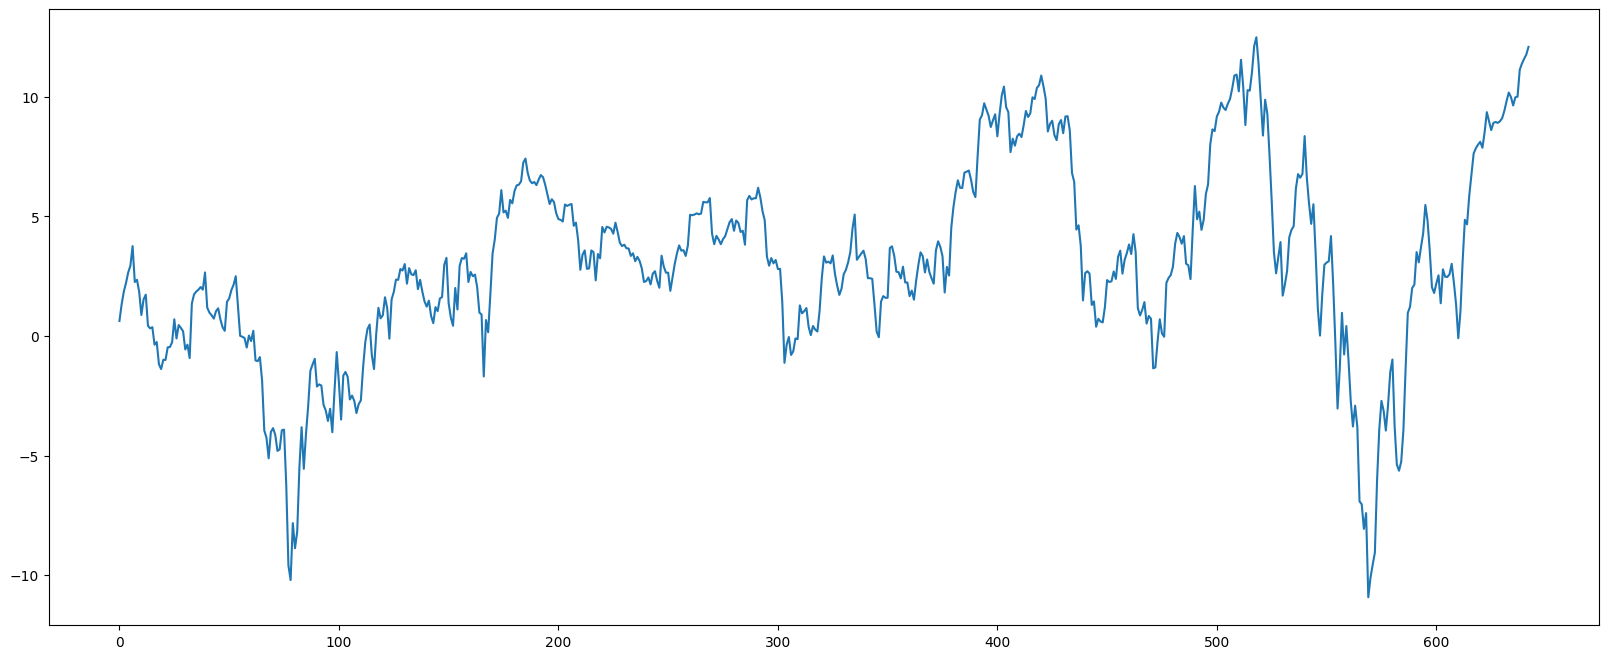

In [38]:
# 在使用 matplotlib 绘图, 传递的是一个 Series, 会拿行索引作为X轴, 数据作为Y轴绘制
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
df['price_change_cumsum'].plot()

## 案例

In [39]:
df = pd.read_json('./data/chess.json')
df

chessId   title     name displayName raceIds jobIds  price skillName  \
0         2     狂战士  330.png         奥拉夫      14      9      1      狂战之怒   
1         3    正义巨像  331.png         加里奥   10,14      7      4      杜朗护盾   
2         8   猩红收割者  323.png       弗拉基米尔       2      5      1      鲜血转换   
3         9    末日使者  332.png        费德提克    6,13     10      4      群鸦风暴   
4        10    正义天使  287.png          凯尔     7,9      4      5      登神长阶   
5        16    众星之子  311.png         索拉卡       8      5      2      星体结界   
6        17    迅捷斥候  314.png          提莫       4   12,6      6     提莫的交易   
7        18    麦林炮手  333.png        崔丝塔娜       4     15      2      火箭跳跃   
8        20    雪原双子  303.png      努努和威朗普       6      3      3        吞噬   
9        21    赏金猎人  339.png        厄运小姐       1     15      3      枪林弹雨   
10       22    寒冰射手  273.png          艾希    9,10      2      3     魔法水晶箭   
11       24    武器大师  283.png         贾克斯      11      9      4      强化打击   
12       39    刀锋舞者  334.png        艾瑞莉娅      14    4,9      2      距破之舞   
13       43     天启者  285.png         卡尔玛       8      6      4      灵光闪耀   
14       56    永恒梦魇  302.png          魔腾      13      1      3      暗影之刃   
15       63    复仇焰魂  274.png         布兰德       6      8      2      火焰烙印   
16       64      盲僧  293.png          李青       2      9      3       天雷破   
17       67    暗夜猎手  319.png          薇恩       1      2      1      终极时刻   
18       74    大发明家  281.png        黑默丁格      10   14,5      5     升级！！！   
19       75    圣锤之毅  305.png          波比       4      7      1      圆盾投掷   
20       76   狂野女猎手  301.png         奈德丽       8      9      3     美洲狮形态   
21       77    兽灵行者  317.png         乌迪尔      10      9      1      蛮野本能   
22       79      酒桶  279.png        古拉加斯       8      3      1      醉酒狂暴   
23       85    狂暴之心  288.png          凯南       4      9      2      烈焰猛冲   
24       86  德玛西亚之力  278.png          盖伦    8,16      7      5      神狮裁决   
25       89    曙光女神  294.png         蕾欧娜       7      7      1      烈阳屏障   
26       92    放逐之刃  307.png          锐雯       8      4      3      黎明之刃   
27       99    光辉女郎  297.png         拉克丝       7     10      3      曲光屏障   
28      106    不灭狂雷  324.png        沃利贝尔      13      3      5      末日使者   
29      110    惩戒之箭  318.png         韦鲁斯       7      2      2      圣光箭雨   
30      111    深海泰坦  300.png        诺提勒斯      11      7      2      巨锚猛击   
31      113    北地之怒  309.png         瑟庄妮       2   11,3      2      北地之怒   
32      115    爆破鬼才  327.png         吉格斯       4      8      1      奥术炸弹   
33      117    仙灵女巫  296.png          璐璐       4     10      3     萌力护身！   
34      119   荣耀行刑官  277.png         德莱文       1      4      4      旋转飞斧   
35      120    战争之影  280.png        赫卡里姆       1     11      2      恐惧之灵   
36      121   虚空掠夺者  289.png         卡兹克       8      1      1      品尝恐惧   
37      131    皎月女神  276.png         黛安娜     5,2      1      4      月之降临   
38      134    黑暗元首  312.png         辛德拉       7      6      2      驱使念力   
39      143    荆棘之兴  328.png          婕拉      10      8      3      致命尖刺   
40      157    疾风剑豪  326.png          亚索       2      4      3      灼烧之刃   
41      161    虚空之眼  320.png         维克兹       7      8      4  生命形态瓦解射线   
42      166      影哨  329.png         阿克尚      14      2      5      骄行荡寇   
43      234    破败之王  321.png         佛耶戈       1    1,9      5      君命已决   
44      235    涤魂圣枪  335.png          赛娜      14     15      1      无尽厮守   
45      236    圣枪游侠  336.png         卢锡安      14     15      4      圣枪洗礼   
46      240    暴怒骑士  291.png          克烈       4     11      1      暴烈秉性   
47      266    暗裔剑魔  271.png        亚托克斯       7      4      1      赐死打击   
48      412   魂锁典狱长  315.png          锤石       1      7      2      死亡判决   
49      427      翠神  282.png          艾翁      13    6,5      4       小菊！   
50      429    复仇之矛  284.png        卡莉丝塔       6      4      1        刺穿   
51      497      幻翎  337.png           洛      14    

In [40]:
df1=df.sort_values(by='attack', ascending=False).head(10)
df1

chessId   title     name displayName raceIds jobIds  price skillName  \
43      234    破败之王  321.png         佛耶戈       1    1,9      5      君命已决   
24       86  德玛西亚之力  278.png          盖伦    8,16      7      5      神狮裁决   
34      119   荣耀行刑官  277.png         德莱文       1      4      4      旋转飞斧   
25       89    曙光女神  294.png         蕾欧娜       7      7      1      烈阳屏障   
26       92    放逐之刃  307.png          锐雯       8      4      3      黎明之刃   
14       56    永恒梦魇  302.png          魔腾      13      1      3      暗影之刃   
30      111    深海泰坦  300.png        诺提勒斯      11      7      2      巨锚猛击   
28      106    不灭狂雷  324.png        沃利贝尔      13      3      5      末日使者   
19       75    圣锤之毅  305.png          波比       4      7      1      圆盾投掷   
42      166      影哨  329.png         阿克尚      14      2      5      骄行荡寇   

   skillType                                         skillImage  ... lifeMag  \
43        主动  https://game.gtimg.cn/images/lol/act/img/tft/c...  ...     1.8   
24        主动  https://game.gtimg.cn/images/lol/act/img/tft/c...  ...     1.8   
34        主动  https://game.gtimg.cn/images/lol/act/img/tft/c...  ...     1.8   
25        主动  https://game.gtimg.cn/images/lol/act/img/tft/c...  ...     1.8   
26        主动  https://game.gtimg.cn/images/lol/act/img/tft/c...  ...     1.8   
14        被动  https://game.gtimg.cn/images/lol/act/img/tft/c...  ...     1.8   
30        主动  https://game.gtimg.cn/images/lol/act/img/tft/c...  ...     1.8   
28        主动  https://game.gtimg.cn/images/lol/act/img/tft/c...  ...     1.8   
19        主动  https://game.gtimg.cn/images/lol/act/img/tft/c...  ...     1.8   
42        主动  https://game.gtimg.cn/images/lol/act/img/tft/c...  ...     1.8   

   TFTID  synergies  illustrate     recEquip  proStatus       races     jobs  \
43   321                         569,527,595          无        破败军团  刺客,神盾战士   
24   278                         583,559,589          无  黎明使者,神王·凯旋       骑士   
34   277                         529,540,535         削弱        破败军团      征服者   
25   294                         589,583,579         削弱        圣光卫士       骑士   
26   307                         527,577,543         增强        黎明使者      征服者   
14   302                         596,536,539          无        复生亡魂       刺客   
30   300                         589,583,597          无        铁甲卫士       骑士   
28   324                         589,562,579          无        复生亡魂       斗士   
19   305                         597,583,579          无         小恶魔       骑士   
42   329                         519,539,525          无        光明哨兵       游侠   

          attackData        lifeData  
43  126/226.8/408.24  1000/1800/3240  
24       100/180/324  1050/1890/3402  
34      90/162/291.6   700/1260/2268  
25      80/144/259.2   700/1260/2268  
26      80/144/259.2   850/1530/2754  
14      80/144/259.2   650/1170/2106  
30      80/144/259.2   750/1350/2430  
28      80/144/259.2  1500/2700/4860  
19      80/144/259.2   600/1080/1944  
42        75/135/243   900/1620/2916  

[10 rows x 33 columns]

In [41]:
df_new = df[
    ['armor', 'attack', 'attackData','jobs' ]]
df_new

armor  attack        attackData      jobs
0      35      65      65/117/210.6      神盾战士
1      60      70      70/126/226.8        骑士
2      35      45       45/81/145.8       复苏者
3      40      60      60/108/194.4       秘术师
4      25      75        75/135/243       征服者
5      25      40       40/72/129.6       复苏者
6      30      65      65/117/210.6   大魔王,神谕者
7      20      65      65/117/210.6      强袭炮手
8      45      65      65/117/210.6        斗士
9      25      55       55/99/178.2      强袭炮手
10     20      65      65/117/210.6        游侠
11     50      70      70/126/226.8      神盾战士
12     40      60      60/108/194.4  征服者,神盾战士
13     30      45       45/81/145.8       神谕者
14     30      80      80/144/259.2        刺客
15     20      45       45/81/145.8        法师
16     35      60      60/108/194.4      神盾战士
17     15      35       35/63/113.4        游侠
18     30      45       45/81/145.8  驯龙大师,复苏者
19     40      80      80/144/259.2        骑士
20     35      50         50/90/162      神盾战士
21     30      55       55/99/178.2      神盾战士
22     40      50         50/90/162        斗士
23     30      50         50/90/162      神盾战士
24     60     100       100/180/324        骑士
25     40      80      80/144/259.2        骑士
26     35      80      80/144/259.2       征服者
27     20      40       40/72/129.6       秘术师
28     60      80      80/144/259.2        斗士
29     20      65      65/117/210.6        游侠
30     45      80      80/144/259.2        骑士
31     45      65      65/117/210.6    重骑兵,斗士
32     15      40       40/72/129.6        法师
33     25      40       40/72/129.6       秘术师
34     25      90      90/162/291.6       征服者
35     45      55       55/99/178.2       重骑兵
36     25      55       55/99/178.2        刺客
37     40      55       55/99/178.2        刺客
38     20      40       40/72/129.6       神谕者
39     20      40       40/72/129.6        法师
40     35      60      60/108/194.4       征服者
41     20      45       45/81/145.8        法师
42     35      75        75/135/243        游侠
43     35     126  126/226.8/408.24   刺客,神盾战士
44     15      55       55/99/178.2      强袭炮手
45     25      70      70/126/226.8      强袭炮手
46     30      65      65/117/210.6       重骑兵
47     30      60      60/108/194.4       征服者
48     40      75        75/135/243        骑士
49     50      40       40/72/129.6   神谕者,复苏者
50     15      60      60/108/194.4       征服者
51     35      50         50/90/162       复苏者
52     25      75        75/135/243        游侠
53     60      70      70/126/226.8       重骑兵
54     30      50         50/90/162        刺客
55     40      60      60/108/194.4        斗士
56     50      60      60/108/194.4       秘术师

In [42]:
"""基于df对象, 取所有职业为'骑士'的英雄, 取 attack 进行累计运算"""
df2=df_new[df_new['jobs'] == '骑士'].cumsum()

df2

armor  attack                                         attackData  \
1      60      70                                       70/126/226.8   
19    100     150                           70/126/226.880/144/259.2   
24    160     250                70/126/226.880/144/259.2100/180/324   
25    200     330    70/126/226.880/144/259.2100/180/32480/144/259.2   
30    245     410  70/126/226.880/144/259.2100/180/32480/144/259....   
48    285     485  70/126/226.880/144/259.2100/180/32480/144/259....   

            jobs  
1             骑士  
19          骑士骑士  
24        骑士骑士骑士  
25      骑士骑士骑士骑士  
30    骑士骑士骑士骑士骑士  
48  骑士骑士骑士骑士骑士骑士